In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [39]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

In [40]:
# Select features (let's assume 'Annual Income (k$)' and 'Spending Score (1-100)')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [41]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Perform hierarchical clustering
''' Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters.
It is an unsupervised learning algorithm that seeks to group similar objects into clusters based on their features. 
The result of hierarchical clustering is a dendrogram, which represents the arrangement of the clusters at different levels of similarity.'''
'''There are two main types of hierarchical clustering:
A. Agglomerative (bottom-up) hierarchical clustering:
B. Divisive (top-down) hierarchical clustering: 
A. Agglomerative (bottom-up) hierarchical clustering: In this approach, each data point starts as its own cluster,
and pairs of clusters are successively merged together based on their similarity until all points belong to a single cluster. 
The algorithm proceeds by iteratively merging the two closest clusters until a stopping criterion is met.
Common linkage criteria for merging clusters  include
1. Single linkage 2. Commplete Linkage 3. Wards method'''


'There are two main types of hierarchical clustering:\nA. Agglomerative (bottom-up) hierarchical clustering:\nB. Divisive (top-down) hierarchical clustering: \nA. Agglomerative (bottom-up) hierarchical clustering: In this approach, each data point starts as its own cluster,\nand pairs of clusters are successively merged together based on their similarity until all points belong to a single cluster. \nThe algorithm proceeds by iteratively merging the two closest clusters until a stopping criterion is met.\nCommon linkage criteria for merging clusters  include\n1. Single linkage 2. Commplete Linkage 3. Wards method'

In [43]:
''' B.Divisive (top-down) hierarchical clustering: In this approach, all data points start in a single cluster, 
and clusters are recursively divided into smaller clusters until each data point is in its own cluster.
The algorithm proceeds by iteratively splitting the clusters into two subclusters based on a certain criterion until a stopping criterion is met. '''
from scipy.cluster.hierarchy import fcluster
max_d = 5  # Adjust this threshold based on the dendrogram
clusters = fcluster(linked, t=max_d, criterion='distance')

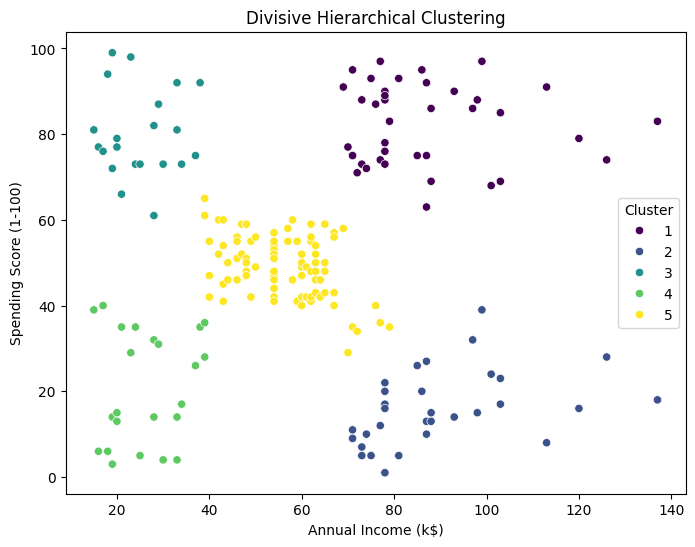

In [44]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=clusters, palette='viridis')
plt.title('Divisive Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [2]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


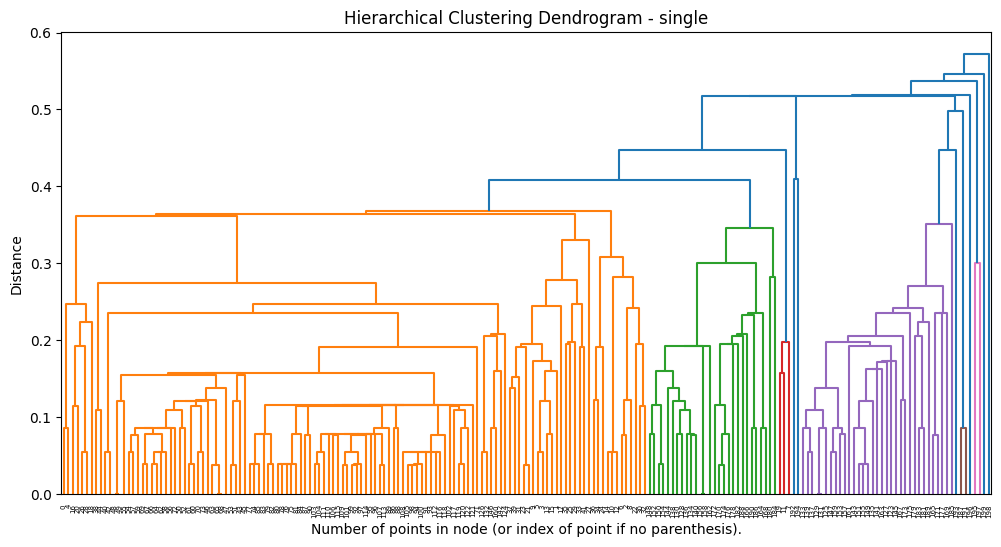

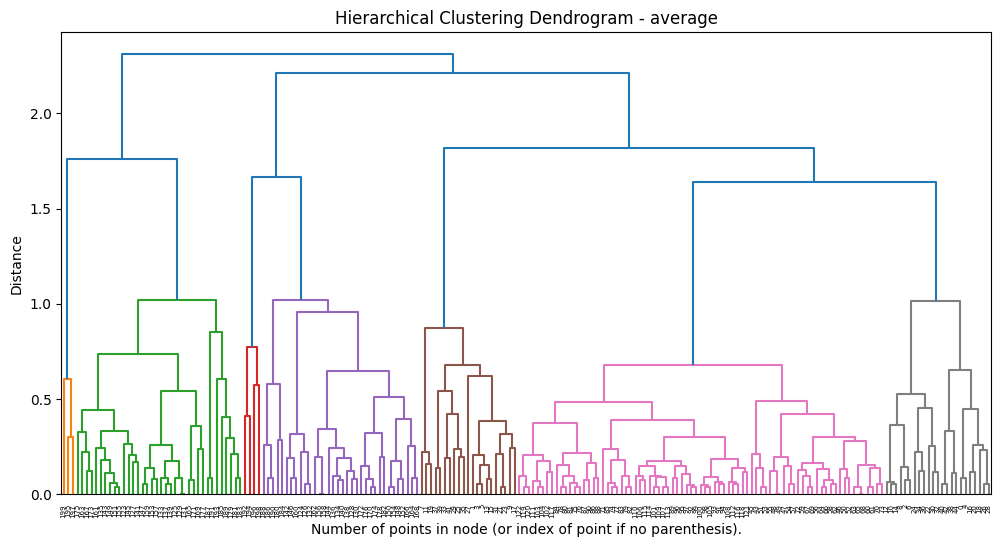

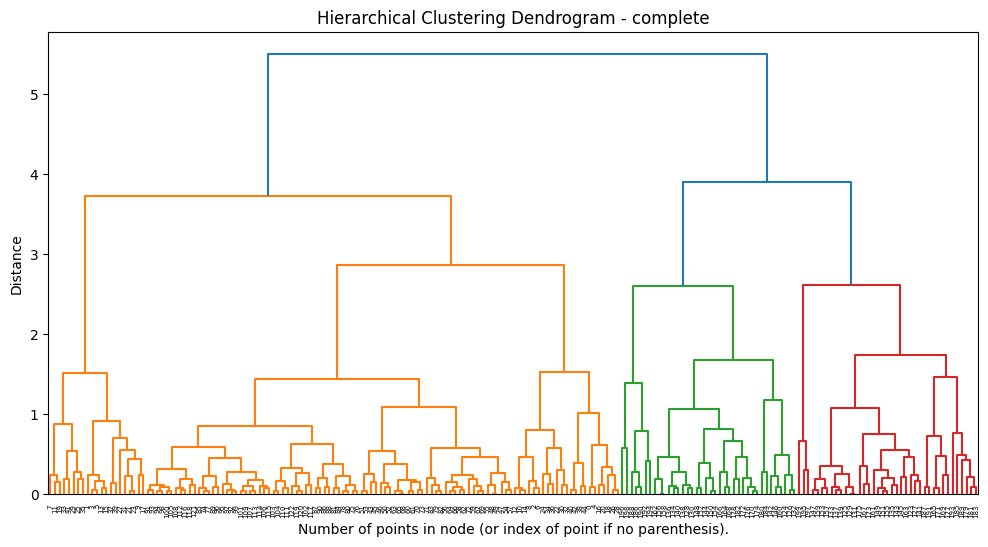

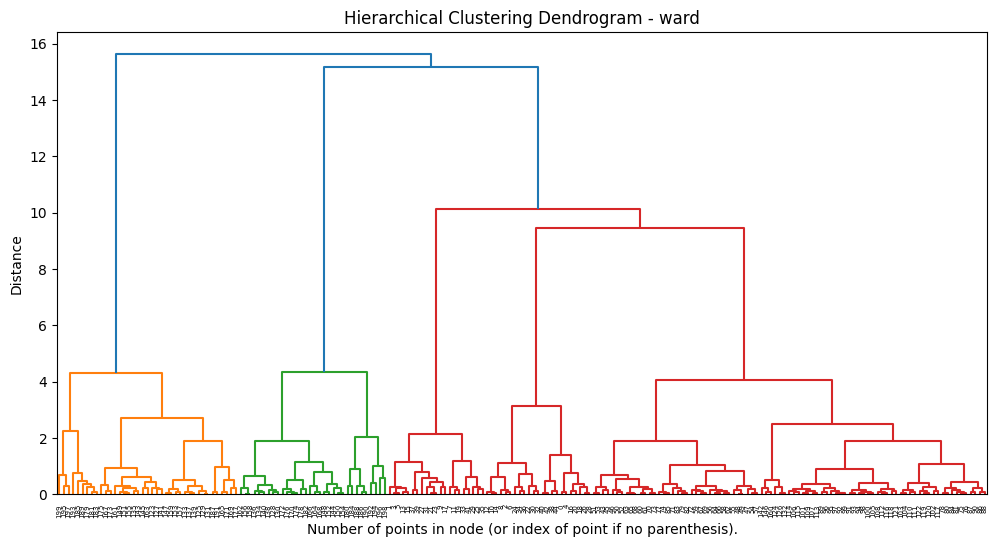

In [45]:
List_HCluster=['single','average','complete','ward']

def drawchart(model, clustering):
    plt.figure(figsize=(12, 6))
    plt.title('Hierarchical Clustering Dendrogram - {}'.format(model))
    plot_dendrogram(clustering)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.ylabel("Distance")
    plt.show()

for i in List_HCluster:
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage=i).fit(X_scaled)
    drawchart(i, clustering)
